In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/new_result1.txt"

In [33]:
fopen_time = [0] * 10
fread_time = [0] * 10
total_read_size = [0] * 10
total_elapsed_time = [0] * 10

In [34]:
with open(file, 'r') as f:
    for i in range(10):
        line = f.readline();
        idx = int(line[21:23]) - 1
        #print(idx)
        line = f.readline();
        line = ''.join(c for c in line if c.isdigit())
        print(int(line))
        fopen_time[idx] = int(line)
        line = f.readline()
        line = ''.join(c for c in line if c.isdigit())
        fread_time[idx] = int(line)
        line = f.readline()
        line = ''.join(c for c in line if c.isdigit())
        total_read_size[idx] = int(line)
        line = f.readline()
        line = ''.join(c for c in line if c.isdigit())
        total_elapsed_time[idx] = int(line)
        f.readline()
f.close()

254302
280487
234885
277996
263392
309262
288046
338971
522750
295571


In [20]:
total_elapsed_time

[1627784,
 1482383,
 1472164,
 1707069,
 1755903,
 1889249,
 1424974,
 1680525,
 1690286,
 1447936]

In [35]:
x = [i for i in range(10)]
w = 0.3
x_l = [i - w for i in x]
x_r = [i + w for i in x]
x_label = ['dtn' + str(i) for i in range(1, 11)]

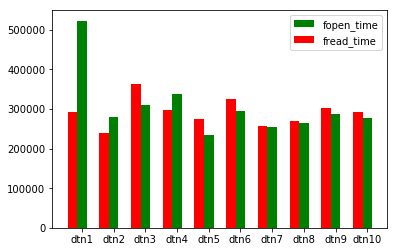

In [40]:
ax = plt.subplot(111)
ax.bar(x, fopen_time,width=w,color='g',align='center', label = 'fopen_time')
ax.bar(x_l, fread_time,width=w,color='r',align='center', label = 'fread_time')
#ax.bar(x_r, total_elapsed_time,width=w,color='r',align='center')
plt.xticks(x, x_label)
plt.legend()
plt.show()

In [2]:
file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small_5_ost.txt"

In [24]:
def parse_mpi_fread_result(file, np = 10):
    total_elapsed_time = [0] * np
    fopen_time = [0] * np
    fread_time = [0] * np
    fclose_time = [0] * np
    total_read_size = [0] * np
    total_read_times = [0] * np
    with open(file, 'r') as f:
        f.readline()
        for i in range(np):
            line = f.readline()
            idx = int(line[21:23]) - 1
            #print(idx)
            line = f.readline();
            line = ''.join(c for c in line if c.isdigit())
            #print(int(line))
            fopen_time[idx] = int(line)

            line = f.readline()
            line = ''.join(c for c in line if c.isdigit())
            fread_time[idx] = int(line)

            line = f.readline()
            line = ''.join(c for c in line if c.isdigit())
            fclose_time[idx] = int(line)

            for i in range(3):
                f.readline() #total sleep time, elapsed time, missing time

            line = f.readline()
            line = ''.join(c for c in line if c.isdigit())
            total_read_size[idx] = int(line)

            f.readline() #total files, sleep count, "==="
            
            line = f.readline()
            line = ''.join(c for c in line if c.isdigit())
            total_read_times[idx] = int(line)
            
            f.readline()
            
        return total_elapsed_time, fopen_time, fread_time, fclose_time, total_read_size, total_read_times
    f.close()

In [25]:
file_pre = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/"
files = ["small_5_ost_1.txt", "small_all_ost_1.txt", "big_all_ost_1.txt"]
tet, fot, frt, fct, trs, trt = [], [], [], [], [], []
for file in files:
    _tet, _fot, _frt, _fct, _trs, _trt = parse_mpi_fread_result(file_pre + file)
    tet.append(_tet); fot.append(_fot); frt.append(_frt); fct.append(_fct); trs.append(_trs); trt.append(_trt)

print(trt)
tet_s = [sum(i)/1e6 for i in tet]
fot_s = [sum(i)/1e6 for i in fot]
frt_s = [sum(i)/1e6 for i in frt]
fct_s = [sum(i)/1e6 for i in fct]
trs_s = [sum(i) for i in trs]
trt_s = [sum(i) for i in trt]


# file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small_5_ost.txt"
# s5o_tet, s5o_fot, s5o_frt, s5o_fct, s5o_trs = parse_mpi_fread_result(file)

# file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small_all_ost.txt"
# sao_tet, sao_fot, sao_frt, sao_fct, sao_trs = parse_mpi_fread_result(file)

# file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/big_all_ost.txt"
# bao_tet, bao_fot, bao_frt, bao_fct, bao_trs = parse_mpi_fread_result(file)

[399511, 402748, 378555, 464782, 414270, 489890, 381892, 470070, 433824, 400892]
[399511, 402748, 378555, 464782, 414270, 489890, 381892, 470070, 433824, 400892]
[410486, 445091, 418450, 434733, 421773, 398855, 393175, 424062, 402885, 424344]
[[399511, 402748, 378555, 464782, 414270, 489890, 381892, 470070, 433824, 400892], [399511, 402748, 378555, 464782, 414270, 489890, 381892, 470070, 433824, 400892], [410486, 445091, 418450, 434733, 421773, 398855, 393175, 424062, 402885, 424344]]


In [9]:
trt_s

[4236434, 4236434, 4173854]

In [10]:
# s5o_tet_s = sum(s5o_tet); s5o_fot_s = sum(s5o_fot); s5o_frt_s = sum(s5o_frt); s5o_fct_s = sum(s5o_fct); s5o_trs_s = sum(s5o_trs)
# sao_tet_s = sum(sao_tet); sao_fot_s = sum(sao_fot); sao_frt_s = sum(sao_frt); sao_fct_s = sum(sao_fct); sao_trs_s = sum(sao_trs)
# bao_tet_s = sum(bao_tet); bao_fot_s = sum(bao_fot); bao_frt_s = sum(bao_frt); bao_fct_s = sum(bao_fct); bao_trs_s = sum(bao_trs)


In [26]:
label = ["small_5_ost", "small_all_ost", "big_all_ost"]
x = [i for i in range(3)]

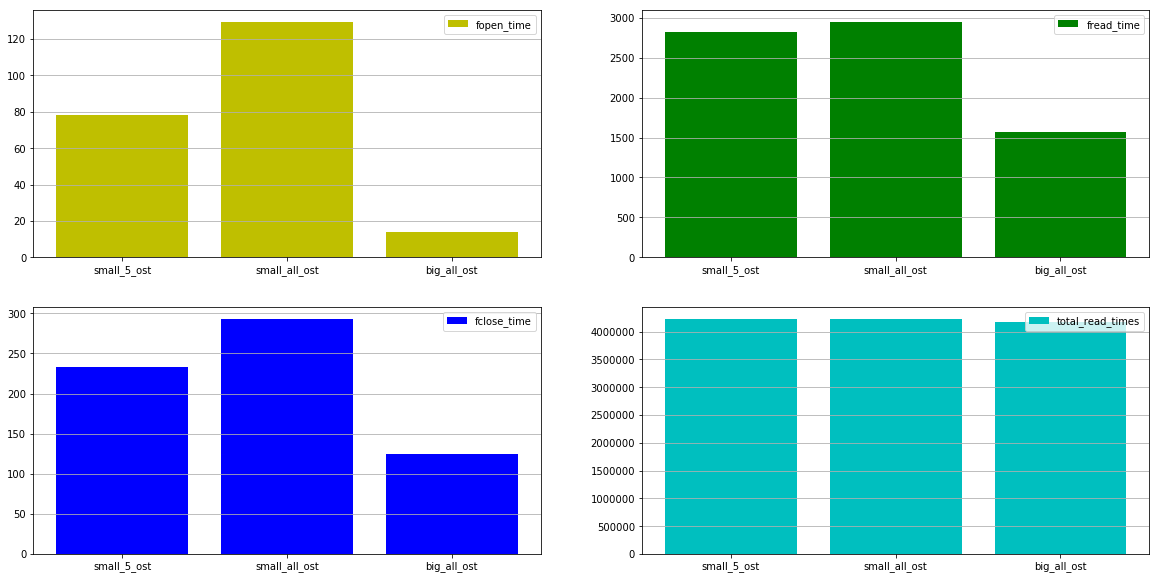

In [27]:
plt.figure(figsize = (20, 10))
ax = plt.subplot(221)
ax.bar(x, fot_s, color='y', label = 'fopen_time')
ax.yaxis.grid()
plt.xticks(x, label)
plt.legend()
ax = plt.subplot(222)
ax.yaxis.grid()
ax.bar(x, frt_s, color='g', label = 'fread_time')
plt.xticks(x, label)
plt.legend()
ax = plt.subplot(223)
ax.yaxis.grid()
ax.bar(x, fct_s, color='b', label = 'fclose_time')
plt.xticks(x, label)
plt.legend()
ax = plt.subplot(224)
ax.yaxis.grid()
ax.bar(x, trt_s, color='c', label = 'total_read_times')
plt.xticks(x, label)
plt.legend()
plt.show()

In [18]:
w = 0.3
x_l = [i - w for i in x]
x_r = [i + w for i in x]

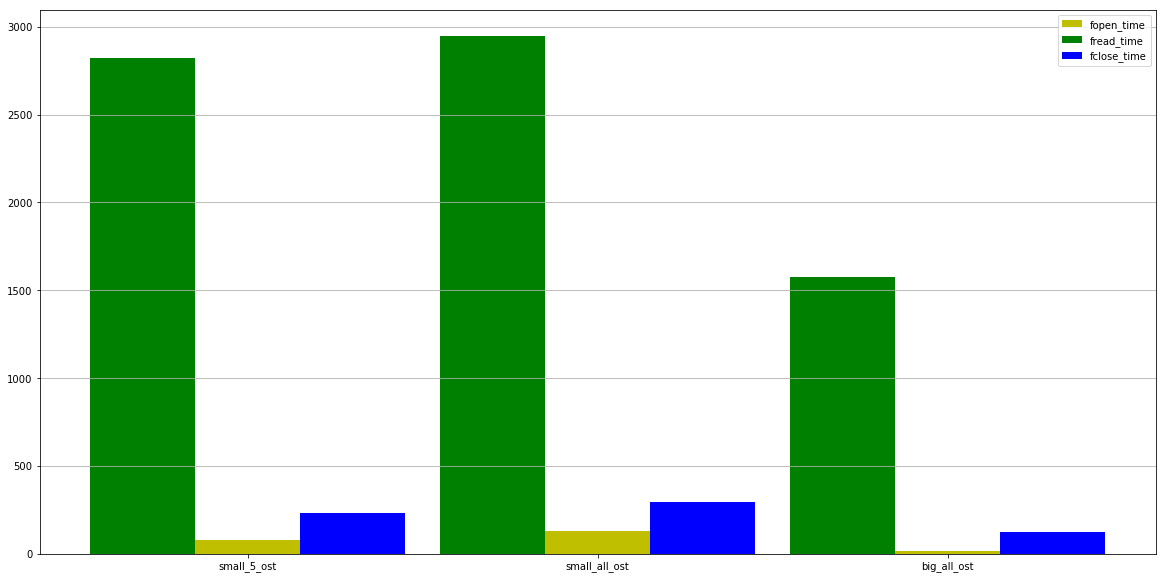

In [19]:
plt.close()
plt.figure(figsize = (20, 10))
ax = plt.subplot(111)
ax.bar(x, fot_s, width=w, color='y', align='center', label = 'fopen_time')
ax.bar(x_l, frt_s, width=w, color='g', align='center', label = 'fread_time')
ax.bar(x_r, fct_s, width=w, color='b', align='center', label = 'fclose_time')
ax.yaxis.grid()
plt.xticks(x, label)
plt.legend()
plt.show()

In [20]:
file = "/global/cscratch1/sd/yuanlai/gf_test/new_read_test_results/vary_dis_result/08.09-19.35.03.txt"

In [21]:
cc_num = 24
sao_speeds = [0] * cc_num
s5o_speeds = [0] * cc_num
bao_speeds = [0] * cc_num

size = 2**40
with open(file ,"r") as f:
    for i in [0, 1, 2]:
        f.readline()
        for cc in range(cc_num):
            f.readline()
            f.readline()
            time = float(f.readline().rstrip('\n'))
            speed = size / time
            speed = speed / (2**30)
            sao_speeds[cc] += speed
            f.readline()
            f.readline()
            time = float(f.readline().rstrip('\n'))
            speed = size / time
            speed = speed / (2**30)
            s5o_speeds[cc] += speed
            f.readline()
            f.readline()
            time = float(f.readline().rstrip('\n'))
            speed = size / time
            speed = speed / (2**30)
            bao_speeds[cc] += speed
            f.readline()
f.close()
sao_speeds = [float("%.2f" % (i / 3)) for i in sao_speeds]
s5o_speeds = [float("%.2f" % (i / 3)) for i in s5o_speeds]
bao_speeds = [float("%.2f" % (i / 3)) for i in bao_speeds]

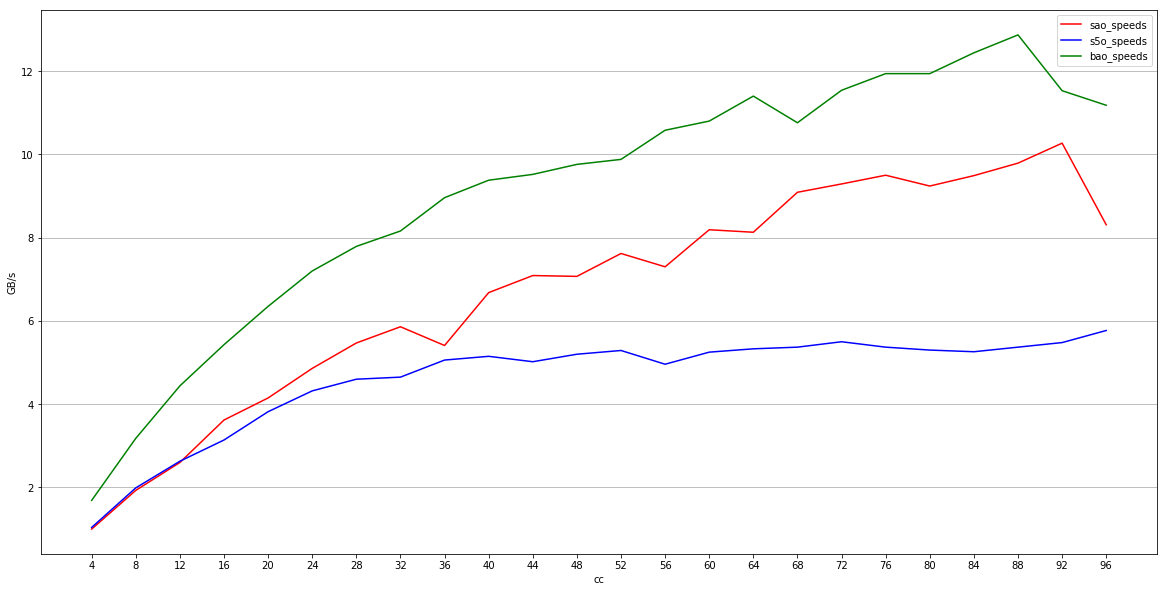

In [22]:
x = [i for i in range(4, 100, 4)]
plt.close()
plt.figure(figsize = (20, 10))
ax = plt.subplot(111)
plt.plot(x, sao_speeds, color = "r", label = "sao_speeds")
plt.plot(x, s5o_speeds, color = "b", label = "s5o_speeds")
plt.plot(x, bao_speeds, color = "g", label = "bao_speeds")
ax.yaxis.grid()
plt.xticks(x)
plt.legend()
plt.xlabel("cc")
plt.ylabel("GB/s")
plt.show()

In [7]:
def np_plot(fot_s, frt_s, fct_s, trt_s, title):
    label = ["small_5_ost", "small_all_ost", "big_all_ost"]
    x = [i for i in range(3)]
    plt.suptitle(title)
    plt.figure(figsize = (20, 10))
    
    ax = plt.subplot(221)
    ax.bar(x, fot_s, color='y', label = 'fopen_time')
    ax.yaxis.grid()
    plt.xticks(x, label)
    plt.legend()
    ax = plt.subplot(222)
    ax.yaxis.grid()
    ax.bar(x, frt_s, color='g', label = 'fread_time')
    plt.xticks(x, label)
    plt.legend()
    ax = plt.subplot(223)
    ax.yaxis.grid()
    ax.bar(x, fct_s, color='b', label = 'fclose_time')
    plt.xticks(x, label)
    plt.legend()
    ax = plt.subplot(224)
    ax.yaxis.grid()
    ax.bar(x, trt_s, color='c', label = 'total_read_times')
    plt.xticks(x, label)
    plt.legend()
    plt.show()

In [19]:
def parse_mpi_fread_result_vary_np(file, nps):
    count = 0
    with open(file, 'r') as f:
        elapsed_time_np = []
        for np in nps:
            total_elapsed_time = [0] * np
            fopen_time = [0] * np
            fread_time = [0] * np
            fclose_time = [0] * np
            total_read_size = [0] * np
            total_read_times = [0] * np
            f.readline()
            count += 1
            tet, fot, frt, fct, trs, trt = [], [], [], [], [], []
            elapsed_time = [0] * 3
            for data in range(3):
                line = f.readline()
                line = ''.join(c for c in line if c.isdigit())
                elapsed_time[data] = int(line)
                count += 1
                for i in range(np):
                    try:
                        line = f.readline()
                        count += 1
                        idx = int(line[21:23]) - 1
                        #print(idx)
                        line = f.readline();
                        count += 1
                        line = ''.join(c for c in line if c.isdigit())
                        #print(int(line))
                        fopen_time[idx] = int(line)

                        line = f.readline()
                        count += 1
                        line = ''.join(c for c in line if c.isdigit())
                        fread_time[idx] = int(line)

                        line = f.readline()
                        count += 1
                        line = ''.join(c for c in line if c.isdigit())
                        fclose_time[idx] = int(line)

                        for i in range(3):
                            f.readline() #total sleep time, elapsed time, missing time
                            count += 1

                        line = f.readline()
                        count += 1
                        line = ''.join(c for c in line if c.isdigit())
                        total_read_size[idx] = int(line)

                        f.readline() #total files, sleep count, "==="
                        count += 1

                        line = f.readline()
                        count += 1
                        line = ''.join(c for c in line if c.isdigit())
                        total_read_times[idx] = int(line)
                        f.readline()
                        count += 1
                    except:
                        print(count)
                        return
                line = f.readline()
                line = ''.join(c for c in line if c.isdigit())
                elapsed_time[data] = int(line) - elapsed_time[data]
                count += 1


                tet.append(total_elapsed_time[:]); fot.append(fopen_time[:]); frt.append(fread_time[:]); 
                fct.append(fclose_time[:]); trs.append(total_read_size[:]); trt.append(total_read_times[:])
            elapsed_time_np.append(elapsed_time[:])
            tet_s = [sum(i)/1e6 for i in tet]
            fot_s = [sum(i)/1e6 for i in fot]
            frt_s = [sum(i)/1e6 for i in frt]
            fct_s = [sum(i)/1e6 for i in fct]
            trs_s = [sum(i) for i in trs]
            trt_s = [sum(i) for i in trt]
            np_plot(fot_s, frt_s, fct_s, trt_s, str(np))
    print(elapsed_time_np)
    s5o_elepased_time_np = [l[0] for l in elapsed_time_np]
    sao_elepased_time_np = [l[1] for l in elapsed_time_np]
    bao_elepased_time_np = [l[2] for l in elapsed_time_np]
    plt.figure(figsize = (20, 10))
    ax = plt.subplot(111)
    plt.plot(nps, s5o_elepased_time_np, color = "r", label = "s5o_elapsed_time")
    plt.plot(nps, sao_elepased_time_np, color = "b", label = "sao_elapsed_time")
    plt.plot(nps, bao_elepased_time_np, color = "g", label = "bao_elapsed_time")
    plt.xticks(nps)
    plt.legend()
    plt.show()
    
    f.close()

<Figure size 432x288 with 0 Axes>

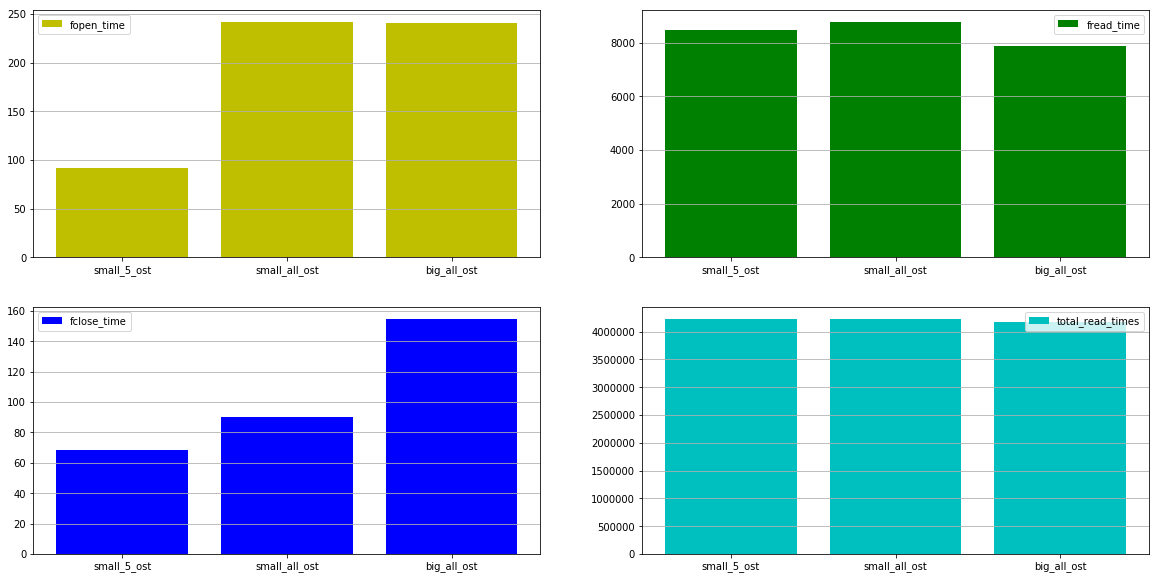

<Figure size 432x288 with 0 Axes>

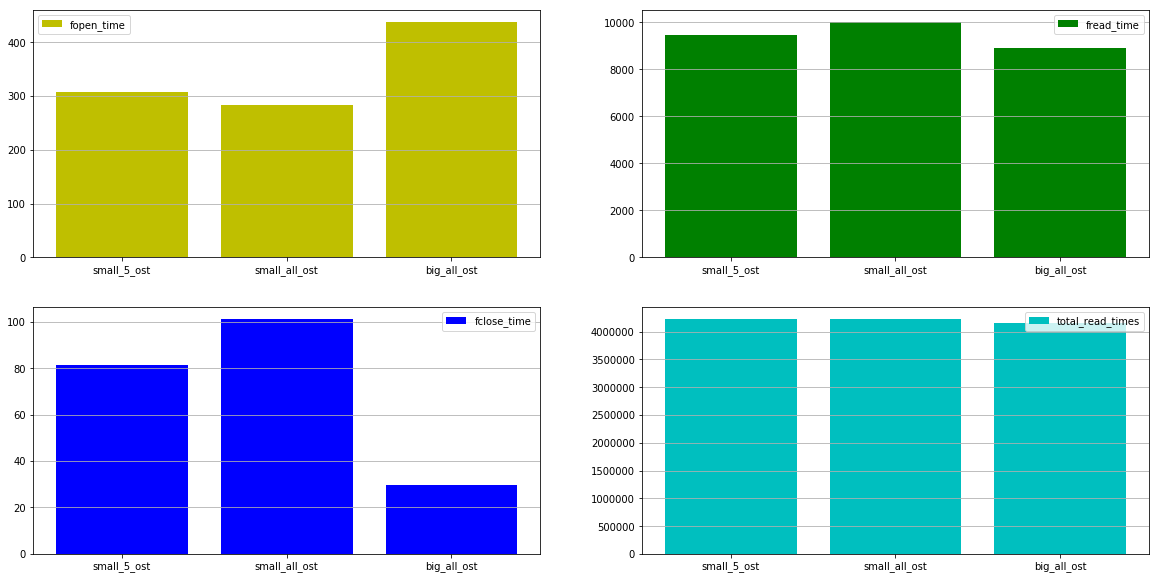

<Figure size 432x288 with 0 Axes>

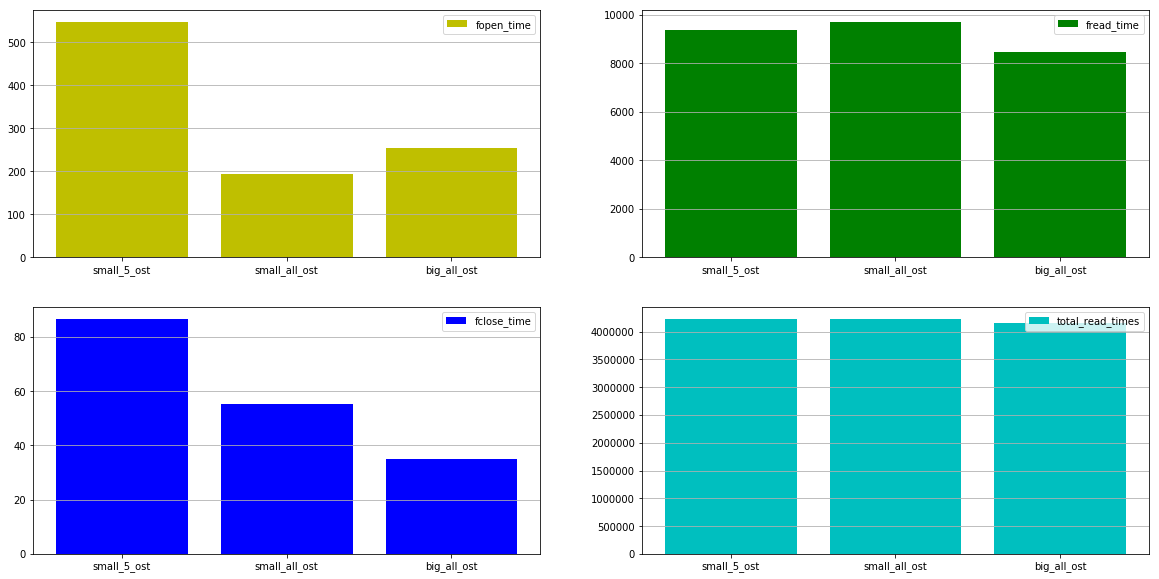

<Figure size 432x288 with 0 Axes>

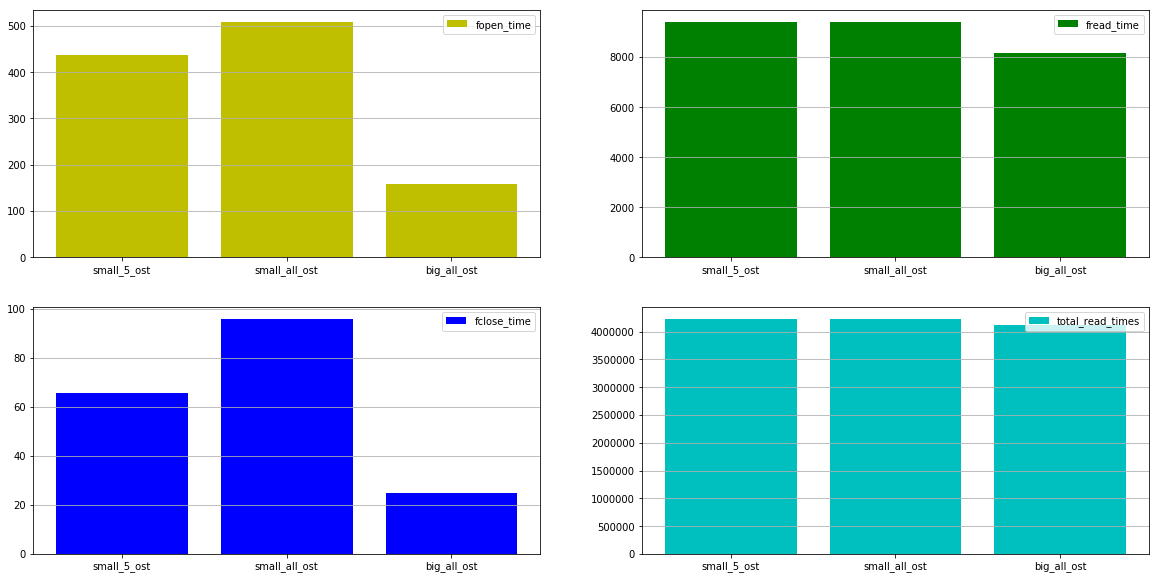

<Figure size 432x288 with 0 Axes>

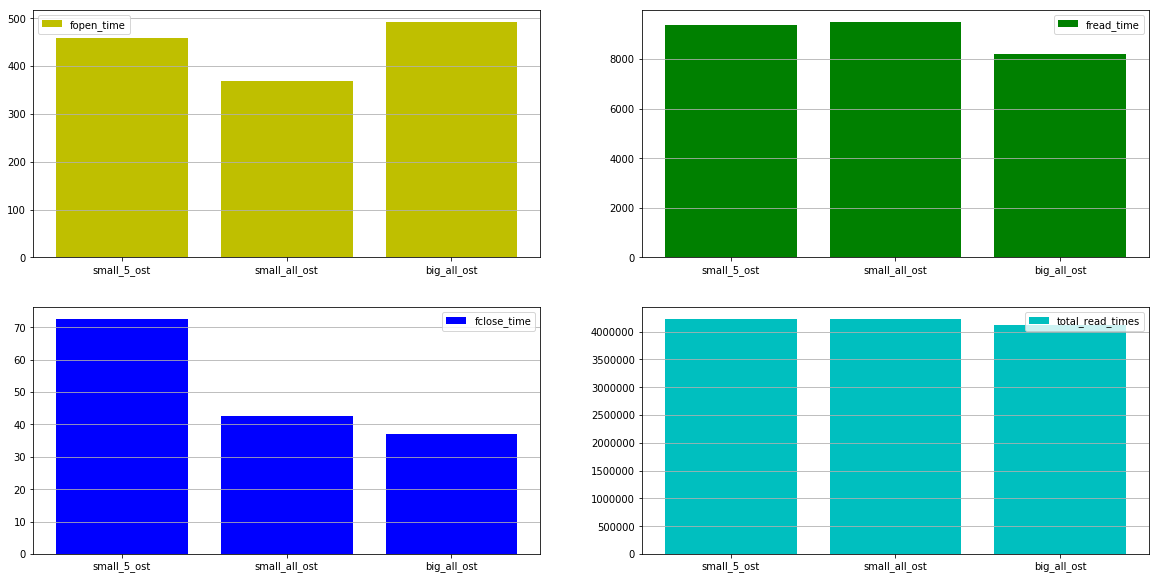

<Figure size 432x288 with 0 Axes>

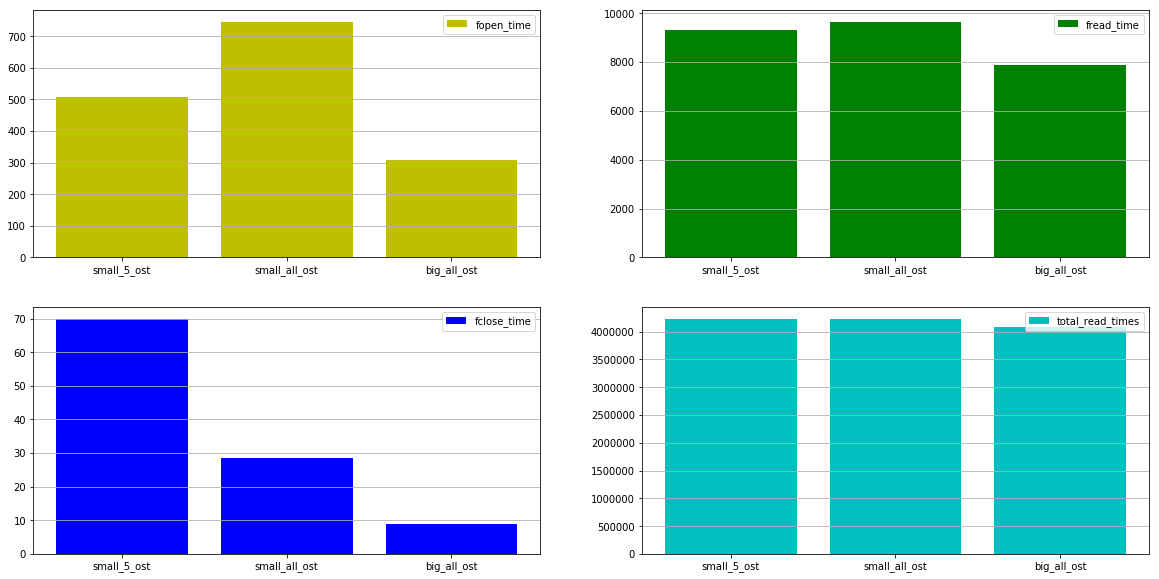

<Figure size 432x288 with 0 Axes>

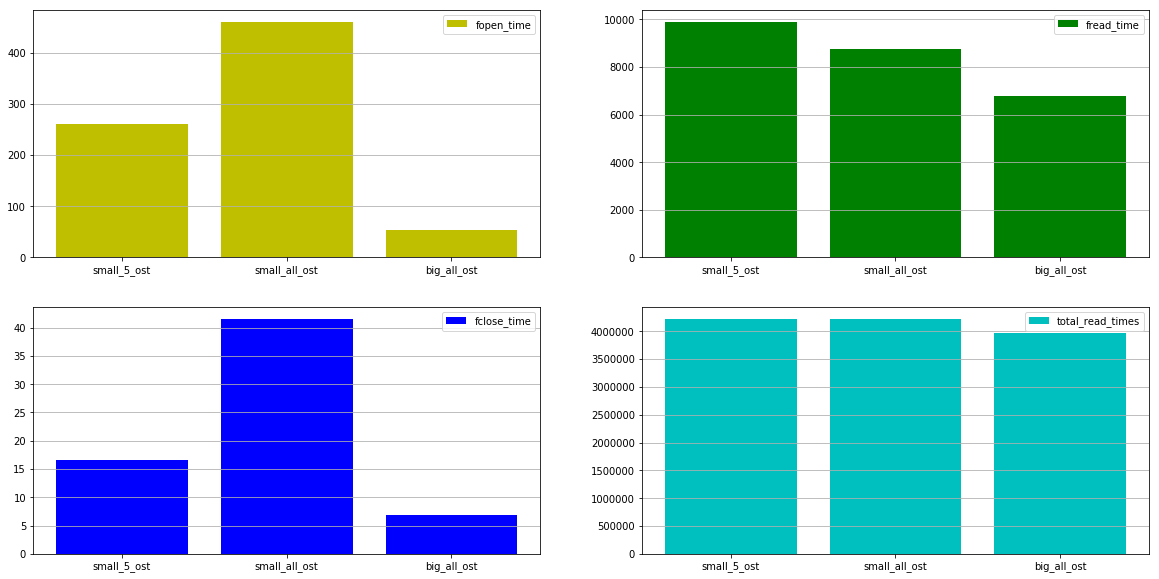

<Figure size 432x288 with 0 Axes>

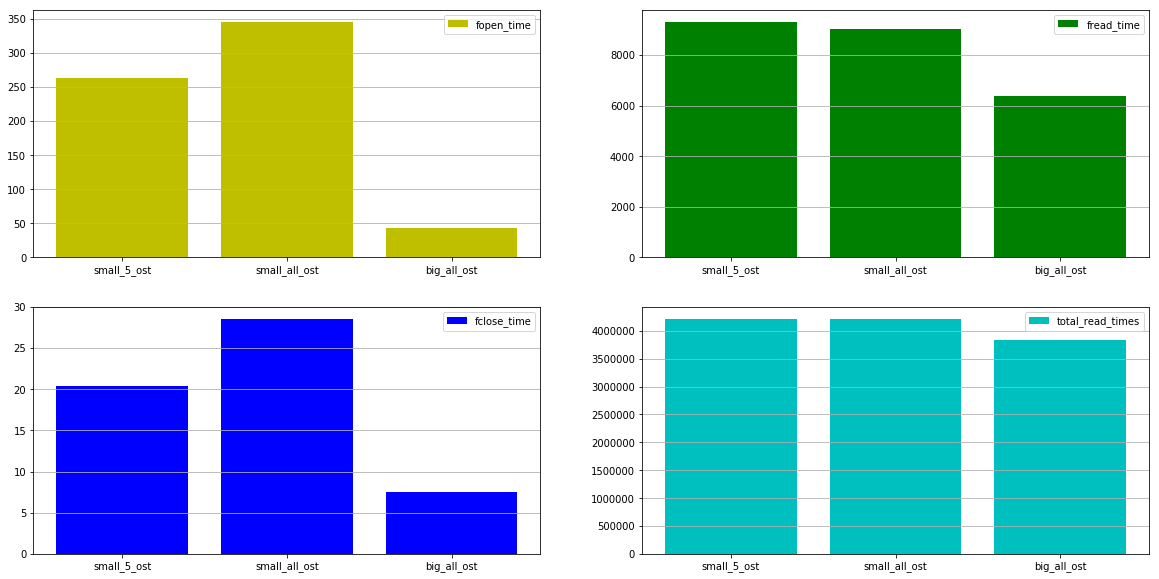

<Figure size 432x288 with 0 Axes>

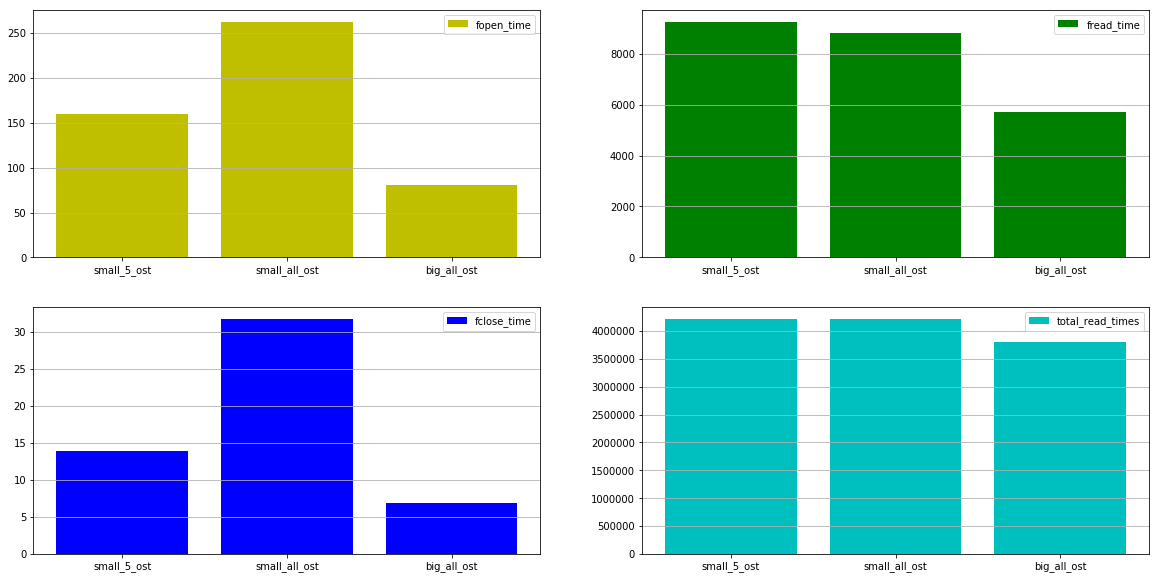

In [16]:
file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/vary_np_test.txt"
parse_mpi_fread_result_vary_np(file, [20, 40, 60, 80, 100, 200, 400, 600, 800])

<Figure size 432x288 with 0 Axes>

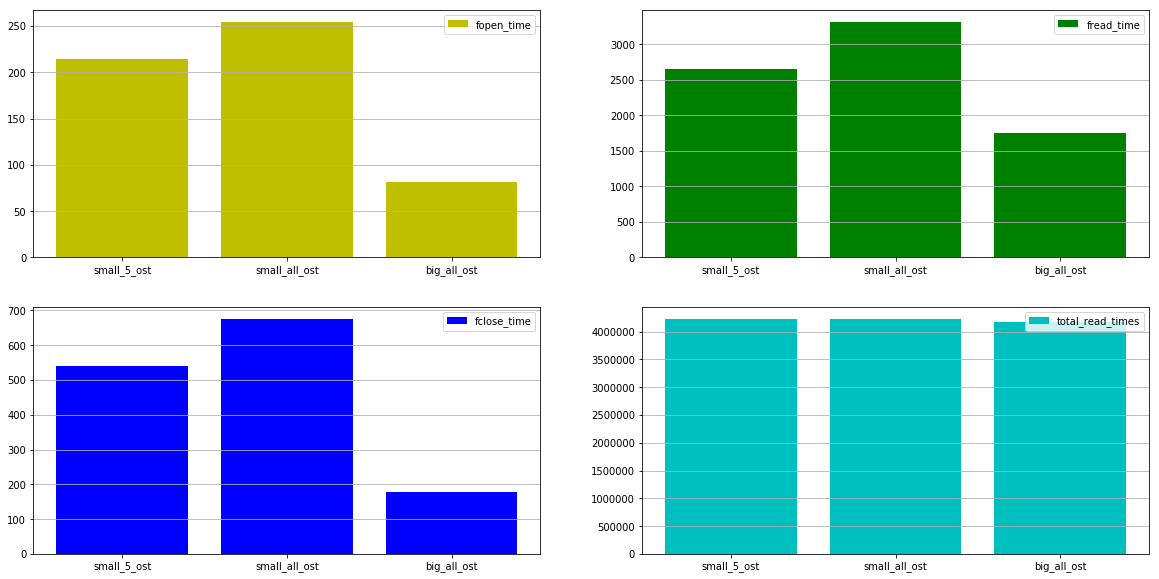

<Figure size 432x288 with 0 Axes>

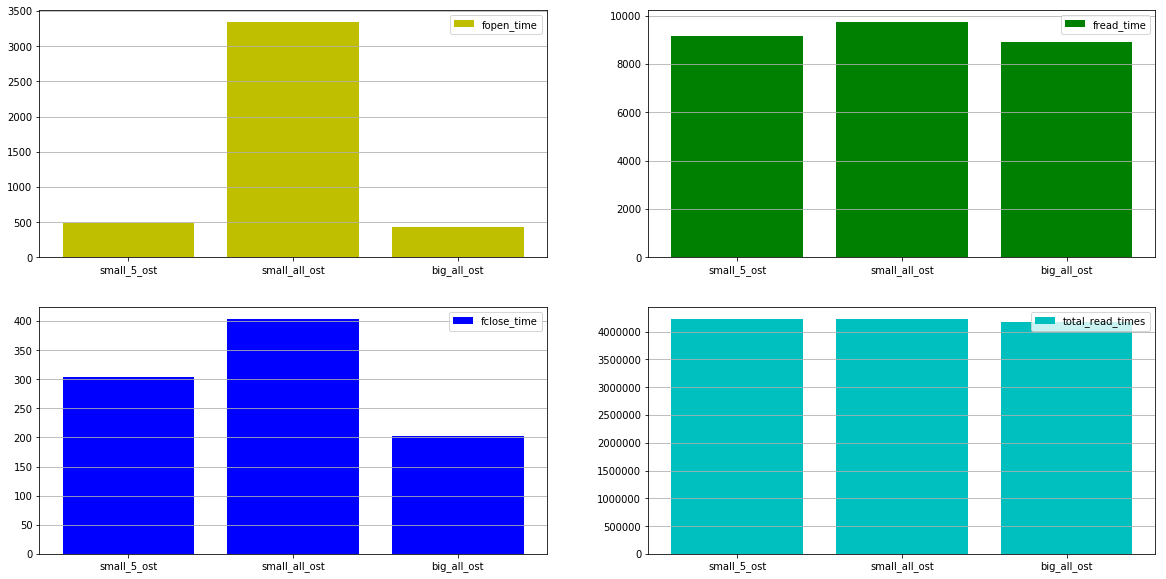

<Figure size 432x288 with 0 Axes>

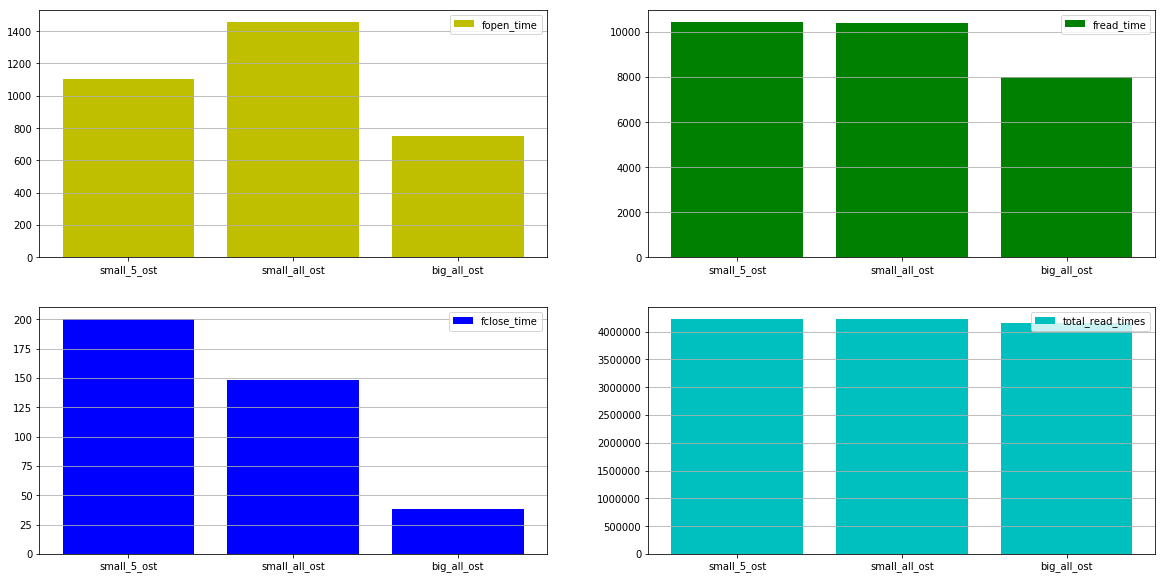

<Figure size 432x288 with 0 Axes>

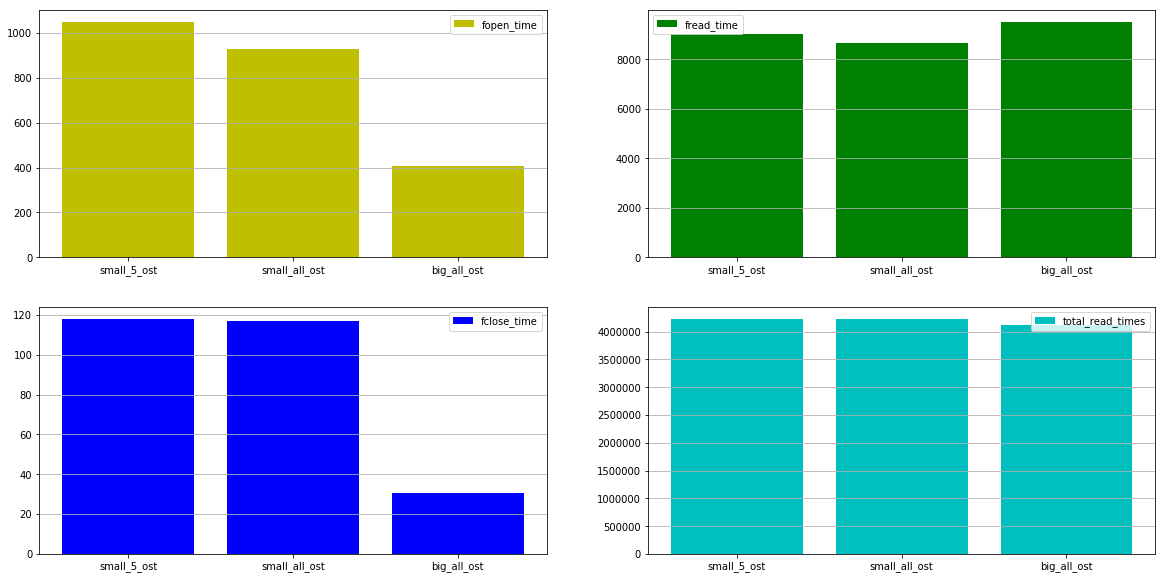

<Figure size 432x288 with 0 Axes>

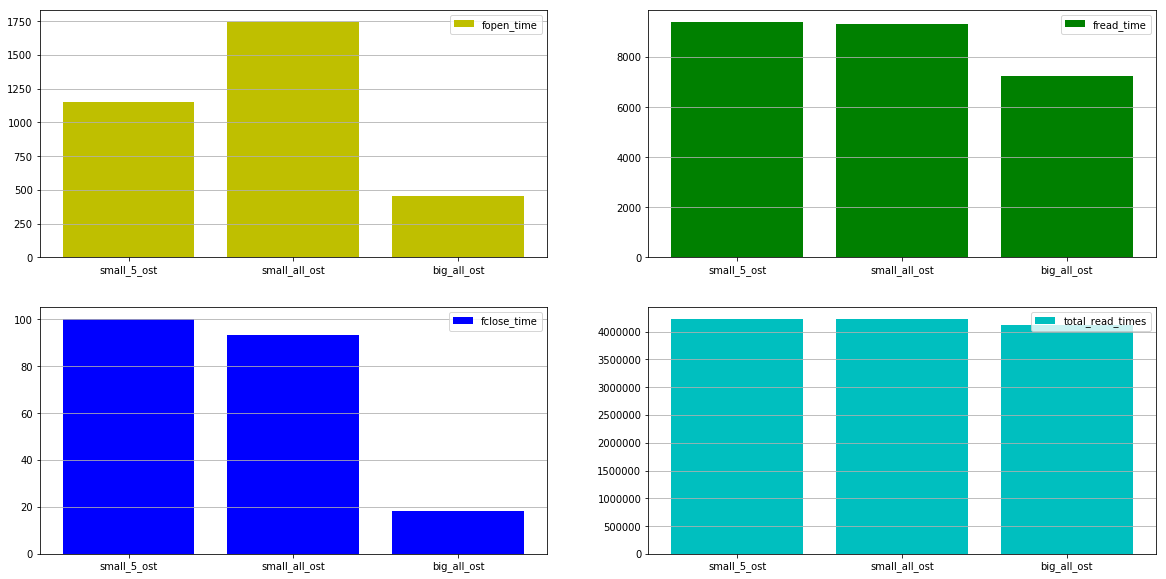

<Figure size 432x288 with 0 Axes>

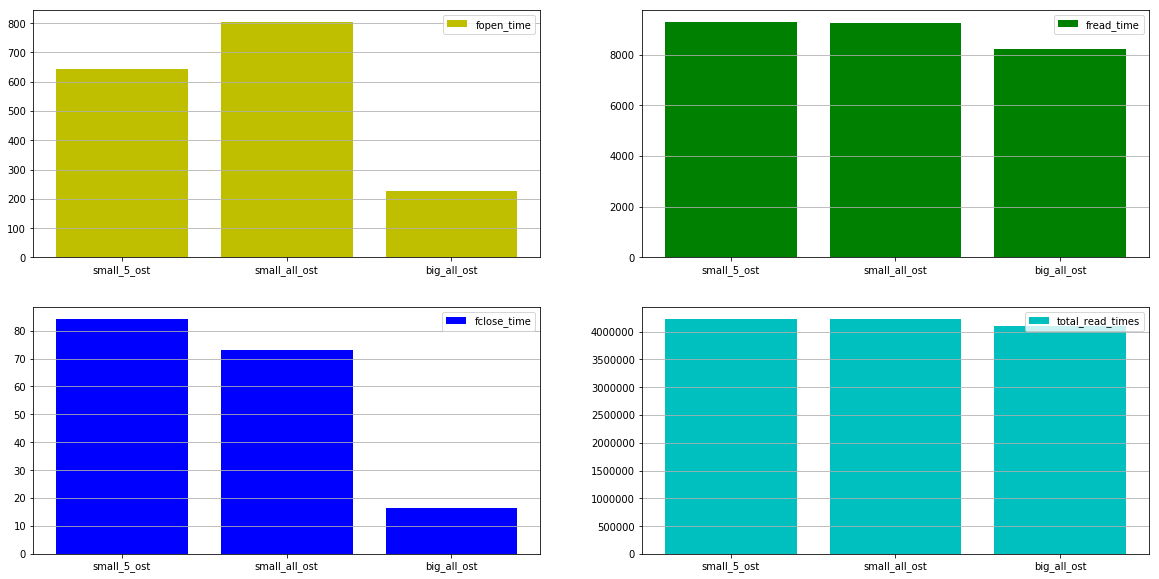

In [11]:
file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/vary_np_test_new.txt"
parse_mpi_fread_result_vary_np(file, [10, 20, 40, 60, 80, 100])

<Figure size 432x288 with 0 Axes>

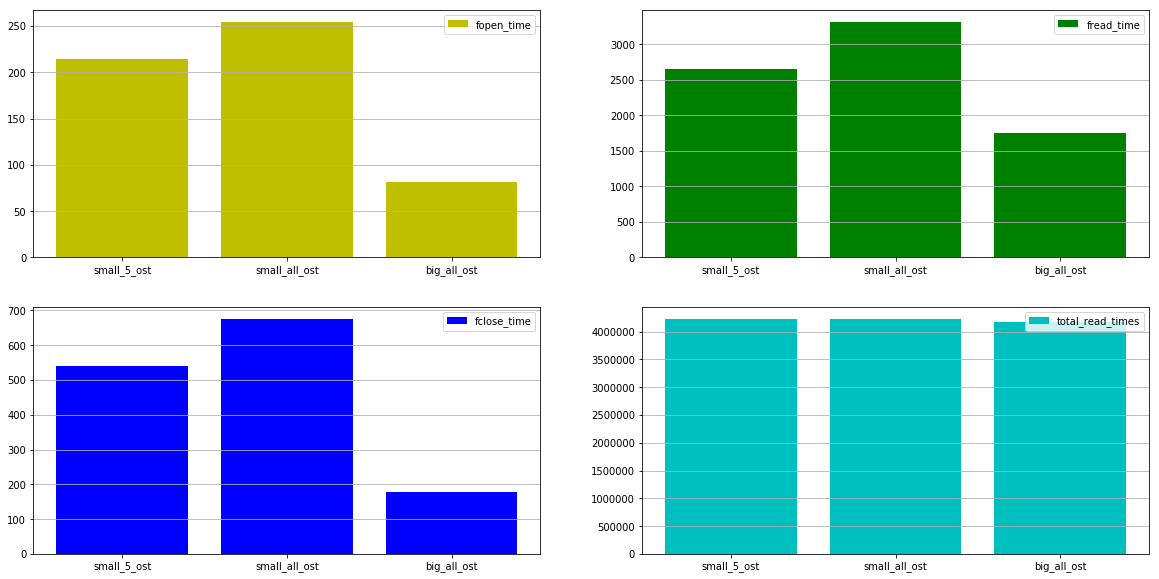

<Figure size 432x288 with 0 Axes>

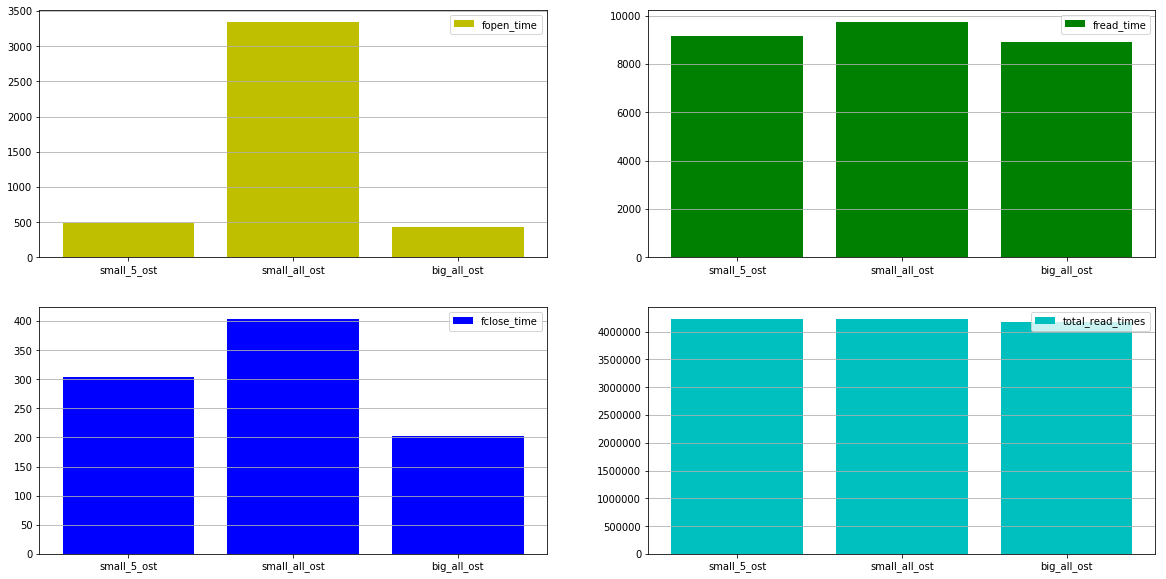

<Figure size 432x288 with 0 Axes>

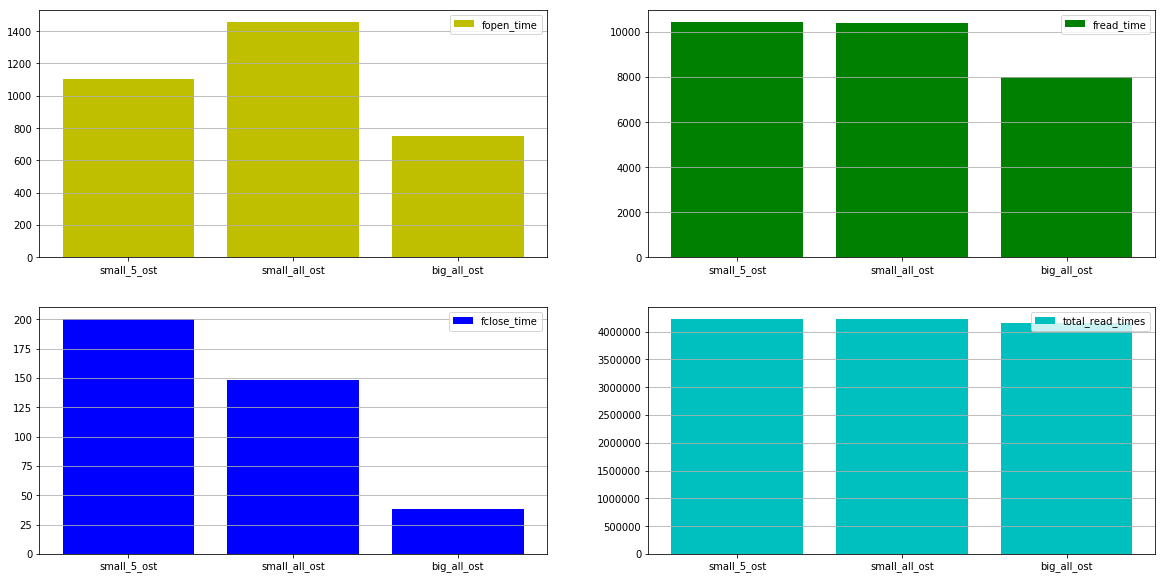

<Figure size 432x288 with 0 Axes>

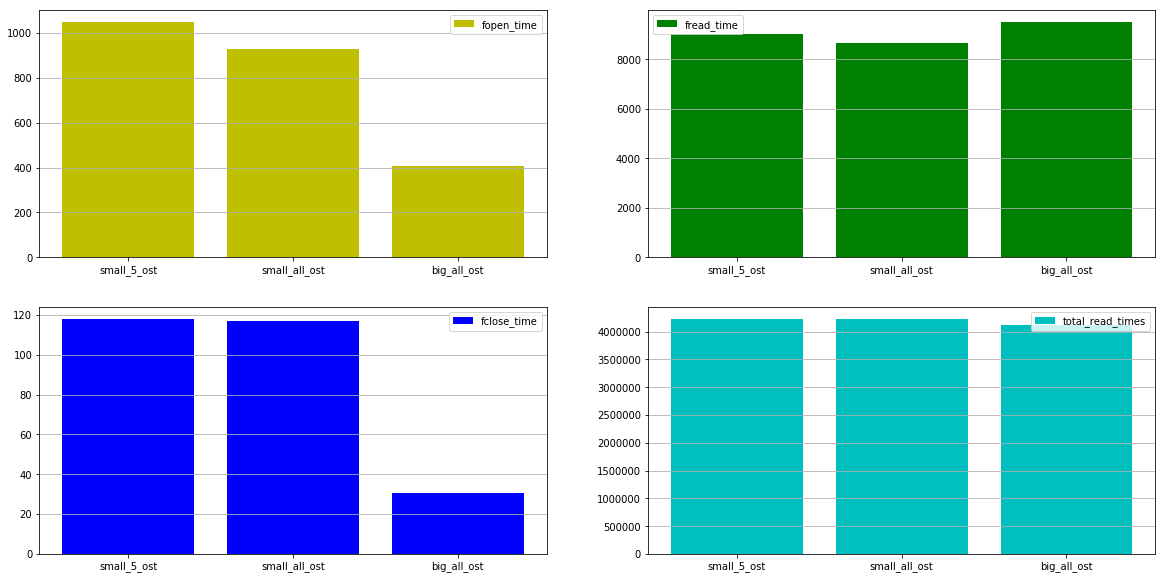

<Figure size 432x288 with 0 Axes>

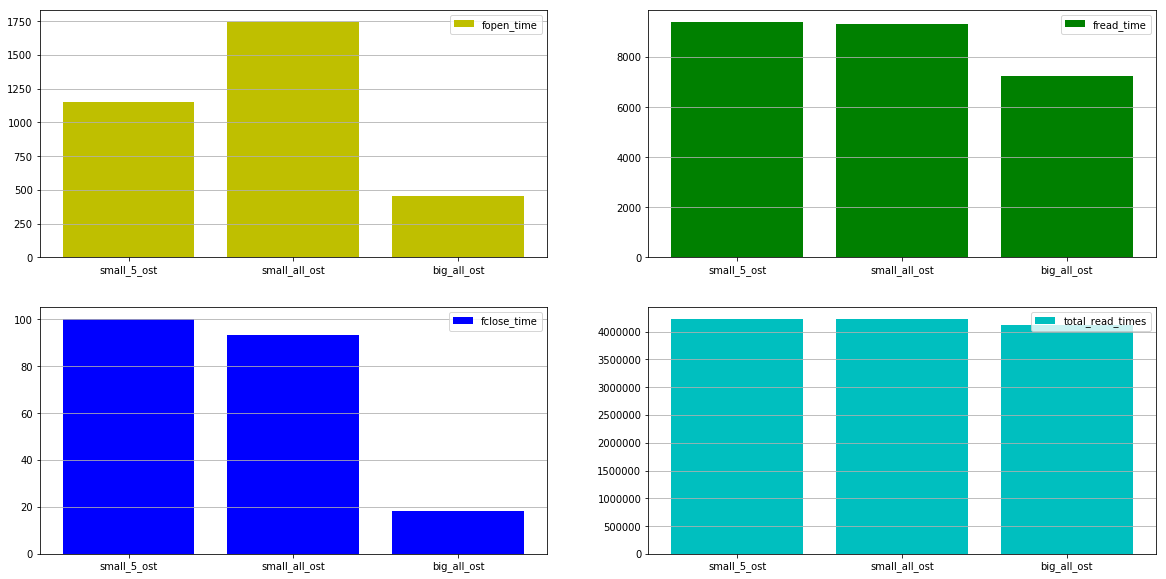

<Figure size 432x288 with 0 Axes>

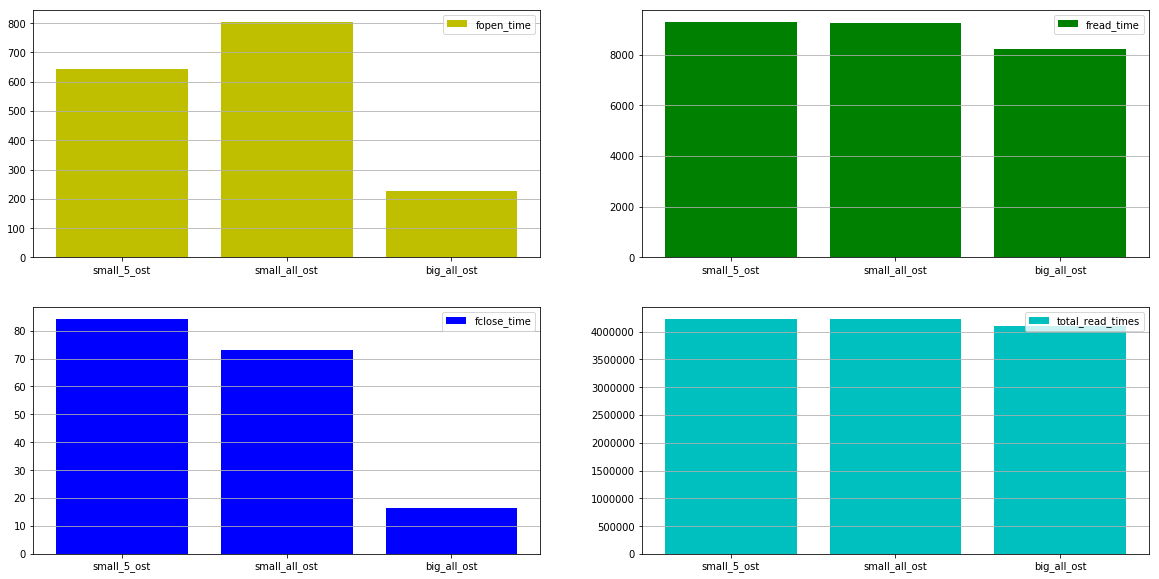

[[1103, 1173, 941], [1906, 2192, 1714], [2262, 2046, 1711], [1948, 1810, 2033], [1980, 1949, 1610], [1910, 1936, 1749]]


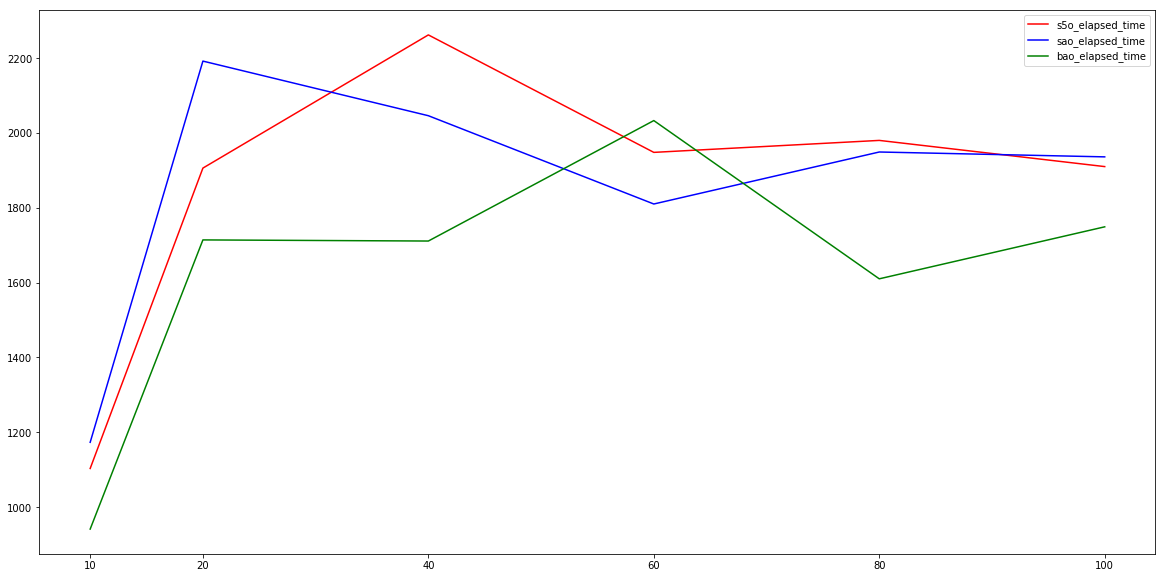

In [21]:
file = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/vary_np_test_new.txt"
parse_mpi_fread_result_vary_np(file, [10, 20, 40, 60, 80, 100])

In [ ]:
s5o_elepased_time = 